<a href="https://colab.research.google.com/github/rafbot-v7/credit_card_fraud/blob/main/credit_card_fraud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import gdown
url = 'https://drive.google.com/uc?id=1-kv4QTwvdqVMAgwHfcT92hOCcfwV1Urq'
output = 'fraud_test.csv'
gdown.download(url, output, quiet=False)

Downloading...
From (original): https://drive.google.com/uc?id=1-kv4QTwvdqVMAgwHfcT92hOCcfwV1Urq
From (redirected): https://drive.google.com/uc?id=1-kv4QTwvdqVMAgwHfcT92hOCcfwV1Urq&confirm=t&uuid=245444de-0013-416b-a478-5990eebb5548
To: /content/fraud_test.csv
100%|██████████| 150M/150M [00:01<00:00, 96.3MB/s]


'fraud_test.csv'

In [2]:
import gdown
url = 'https://drive.google.com/uc?id=1savE2kJZIGa_z4-QHeiNDgrvsWH4kPMe'
output = 'fraudTrain.csv'
gdown.download(url, output, quiet=False)

Downloading...
From (original): https://drive.google.com/uc?id=1savE2kJZIGa_z4-QHeiNDgrvsWH4kPMe
From (redirected): https://drive.google.com/uc?id=1savE2kJZIGa_z4-QHeiNDgrvsWH4kPMe&confirm=t&uuid=16ee5cbb-7e27-4e4d-adce-26a13fe3bd7f
To: /content/fraudTrain.csv
100%|██████████| 351M/351M [00:05<00:00, 61.3MB/s]


'fraudTrain.csv'

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import  numpy as np
import seaborn as sns

In [4]:
traindf = pd.read_csv('fraudTrain.csv')
testdf = pd.read_csv('fraudTrain.csv')

In [34]:
df = pd.concat([traindf,testdf],axis=0)
df = df.drop(columns='Unnamed: 0',axis=1)

In [22]:
df.head()


,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


<ipython-input-35-d1047125a16d>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='is_fraud',data=df,palette='hls')


<function matplotlib.pyplot.show(close=None, block=None)>

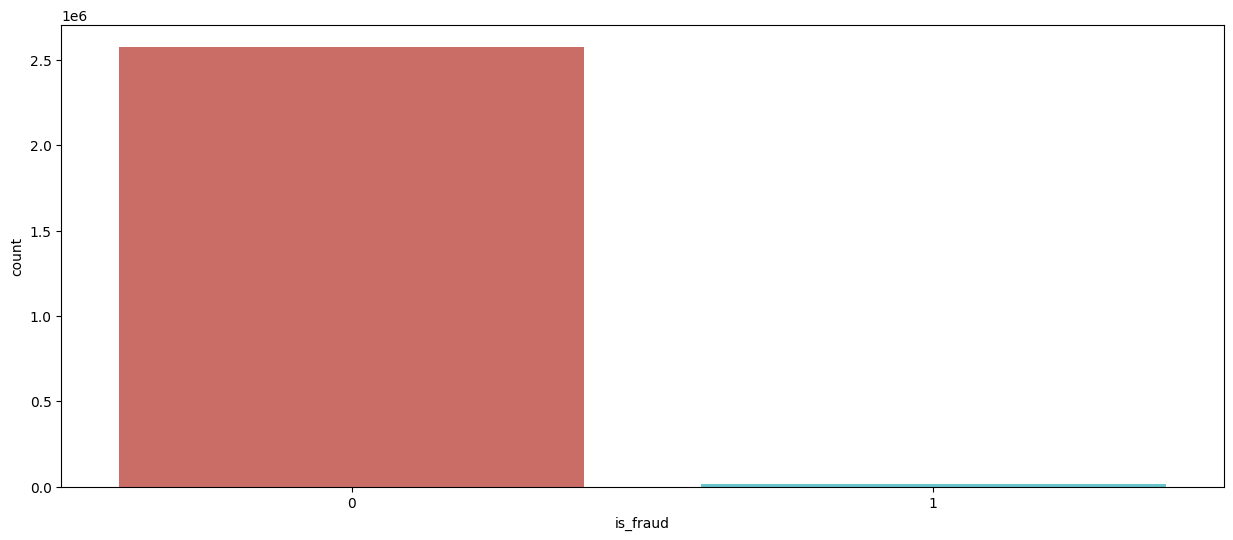

In [35]:
plt.figure(figsize=(15,6))
sns.countplot(x='is_fraud',data=df,palette='hls')
plt.show

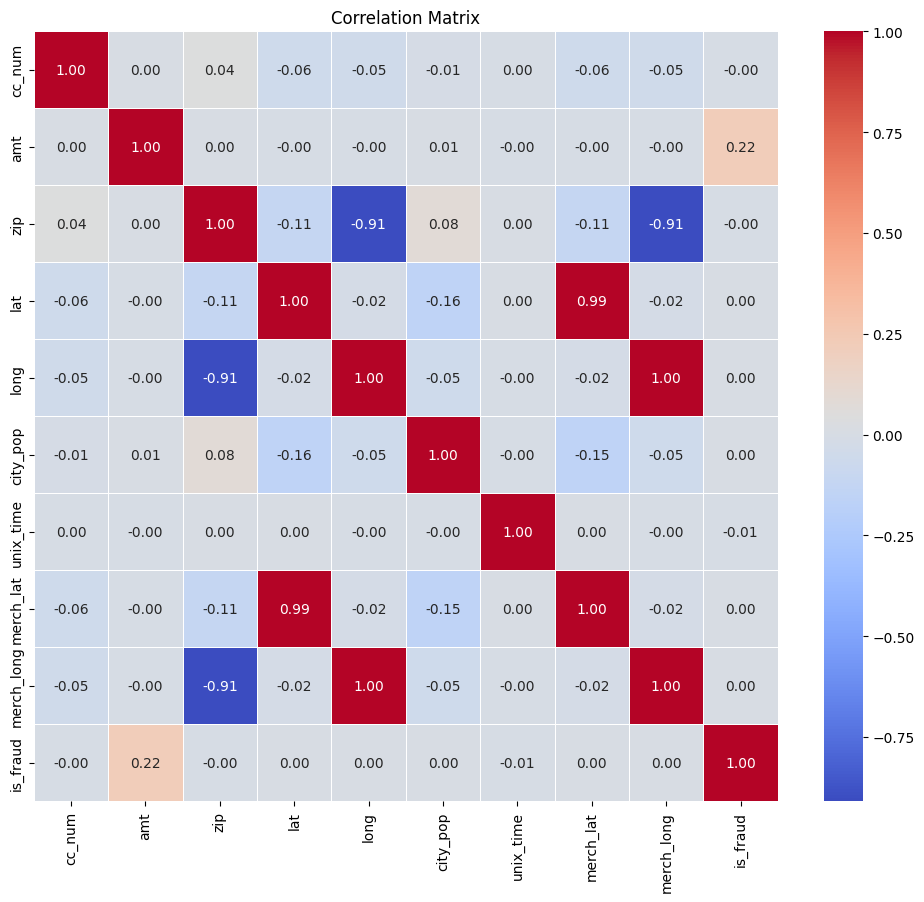

In [23]:
numeric_columns = df.select_dtypes(include=np.number).columns
correlation_matrix = df[numeric_columns].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title("Correlation Matrix")
plt.show()

In [26]:
correlation_threshold = 0.8
selected_features = correlation_matrix[abs(correlation_matrix) > correlation_threshold].index

In [25]:
print(selected_features)

Index(['cc_num', 'amt', 'zip', 'lat', 'long', 'city_pop', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')


In [27]:
df = df[selected_features]
df.head()

,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
0,2703186189652095,4.97,28654,36.0788,-81.1781,3495,1325376018,36.011293,-82.048315,0
1,630423337322,107.23,99160,48.8878,-118.2105,149,1325376044,49.159047,-118.186462,0
2,38859492057661,220.11,83252,42.1808,-112.2620,4154,1325376051,43.150704,-112.154481,0
3,3534093764340240,45.00,59632,46.2306,-112.1138,1939,1325376076,47.034331,-112.561071,0
4,375534208663984,41.96,24433,38.4207,-79.4629,99,1325376186,38.674999,-78.632459,0


In [28]:
from sklearn.model_selection import train_test_split
x = df.drop('is_fraud', axis=1)
y = df['is_fraud']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [53]:
from imblearn.over_sampling import RandomOverSampler

oversampler = RandomOverSampler(random_state=42)


x_trainrs, y_trainrs = oversampler.fit_resample(x_train, y_train)
x_testrs, y_testrs = oversampler.fit_resample(x_test, y_test)

In [39]:
from keras.models import Sequential
from keras.layers import Dense
model = Sequential()
model.add(Dense(32, activation='relu', input_shape=(x_trainrs.shape[1],)))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                320       
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 1)                 17        
                                                                 
Total params: 865 (3.38 KB)
Trainable params: 865 (3.38 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [41]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(x_trainrs, y_trainrs, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
103137/103137 [==============================] - 328s 3ms/step - loss: 77955300589568.0000 - accuracy: 0.5955 - val_loss: 0.9725 - val_accuracy: 0.0000e+00
Epoch 2/10
103137/103137 [==============================] - 307s 3ms/step - loss: 0.6615 - accuracy: 0.6250 - val_loss: 0.9883 - val_accuracy: 0.0000e+00
Epoch 3/10
103137/103137 [==============================] - 297s 3ms/step - loss: 0.6614 - accuracy: 0.6250 - val_loss: 0.9883 - val_accuracy: 0.0000e+00
Epoch 4/10
103137/103137 [==============================] - 242s 2ms/step - loss: 0.6615 - accuracy: 0.6250 - val_loss: 0.9759 - val_accuracy: 0.0000e+00
Epoch 5/10
103137/103137 [==============================] - 247s 2ms/step - loss: 0.6614 - accuracy: 0.6250 - val_loss: 0.9752 - val_accuracy: 0.0000e+00
Epoch 6/10
103137/103137 [==============================] - 247s 2ms/step - loss: 0.6615 - accuracy: 0.6250 - val_loss: 0.9857 - val_accuracy: 0.0000e+00
Epoch 7/10
103137/103137 [==============================] - 255

In [49]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
y_pred_prob = model.predict(x_test)
# Convert probabilities to binary predictions
y_pred = np.round(y_pred_prob)


32226/32226 [==============================] - 75s 2ms/step


In [50]:
# Print accuracy metrics
accuracy = accuracy_score(y_testrs, y_pred)
precision = precision_score(y_testrs, y_pred)
recall = recall_score(y_testrs, y_pred)
f1 = f1_score(y_testrs, y_pred)
# Print accuracy metrics
print("Accuracy: {:.2f}%".format(accuracy * 100))
print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("F1 Score: {:.2f}".format(f1))


print(y_pred_prob[:5])
y_pred[:5]

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy: 50.00%
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
[[0.37050515]
 [0.37050515]
 [0.37050515]
 [0.37050515]
 [0.37050515]]


array([[0.],
       [0.],
       [0.],
       [0.],
       [0.]], dtype=float32)

In [51]:
from imblearn.ensemble import BalancedRandomForestClassifier
model_brf = BalancedRandomForestClassifier(random_state=42)


In [ ]:
model_brf.fit(x_trainrs, y_trainrs)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
y_pred_prob = model.predict(x_test)
# Convert probabilities to binary predictions
y_pred = np.round(y_pred_prob)
# Print accuracy metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
# Print accuracy metrics
print("Accuracy: {:.2f}%".format(accuracy * 100))
print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("F1 Score: {:.2f}".format(f1))


print(y_pred_prob[:5])
y_pred[:5]